In [1]:
from tqdm import trange

import numpy as np

import torch as th
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt

In [2]:
hidden_layer_neurons = 1024
EPOCHS = 10
LEARNING_RATE = 0.01
MOMENTUM = 0.0

In [3]:
from src.model import MyModel

# Model instantiation
model = MyModel(hidden_layer_neurons=hidden_layer_neurons)

# Device selection
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = model.to(device)
print(f"Using device: {device}")

optimizer = th.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

criterion = nn.NLLLoss()

Using device: cpu


In [4]:
# Defining transforms
BATCH_SIZE = 64

to_tensor = transforms.ToTensor()
normalization = transforms.Normalize(mean=0.1307, std=0.3081)

# Loading the datasets
train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transforms.Compose([to_tensor, normalization]),
    download=True,
)


test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    transform=transforms.Compose([to_tensor, normalization]),
    download=True,
)


train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
from src.train_test import train, test, weight_reset

# train the netowork

train_losses = []
train_accu = []

eval_losses = []
eval_accu = []

model.apply(weight_reset)

for epoch in range(1, EPOCHS + 1):
    train(
        epoch,
        train_loader,
        model=model,
        device=device,
        criterion=criterion,
        optimizer=optimizer,
        train_losses=train_losses,
        train_accu=train_accu,
    )
    test(
        test_loader,
        model=model,
        device=device,
        criterion=criterion,
        eval_losses=eval_losses,
        eval_accu=eval_accu,
    )


Epoch : 1
Train Loss: 0.525 | Accuracy: 86.847
Test Loss: 0.299 | Accuracy: 91.440

Epoch : 2
Train Loss: 0.278 | Accuracy: 92.108
Test Loss: 0.240 | Accuracy: 93.240

Epoch : 3
Train Loss: 0.229 | Accuracy: 93.467
Test Loss: 0.204 | Accuracy: 94.060

Epoch : 4
Train Loss: 0.197 | Accuracy: 94.472
Test Loss: 0.181 | Accuracy: 94.810

Epoch : 5
Train Loss: 0.172 | Accuracy: 95.192
Test Loss: 0.162 | Accuracy: 95.180

Epoch : 6
Train Loss: 0.153 | Accuracy: 95.758
Test Loss: 0.148 | Accuracy: 95.730

Epoch : 7
Train Loss: 0.138 | Accuracy: 96.175
Test Loss: 0.135 | Accuracy: 96.120

Epoch : 8
Train Loss: 0.126 | Accuracy: 96.552
Test Loss: 0.125 | Accuracy: 96.410

Epoch : 9
Train Loss: 0.115 | Accuracy: 96.868
Test Loss: 0.117 | Accuracy: 96.680

Epoch : 10
Train Loss: 0.106 | Accuracy: 97.095
Test Loss: 0.110 | Accuracy: 96.830


In [6]:
from src.activations_weights import get_activations, get_weights

hidden_activations, output_activations, predicted = get_activations(
    test_loader=test_loader, device=device, model=model, save=True
)

weights_first_layer, weights_second_layer = get_weights(model=model, save=True)

In [7]:
predicted[:40]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


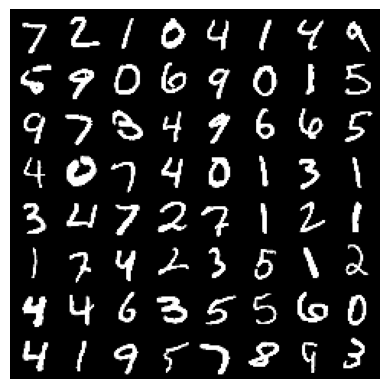

In [8]:
# The same plotting function from the previous lab
def imshow(img):
    npimg = img.numpy()
    plt.axis("off")
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# Visualizing the augmented training dataset
# Same as in previous lab

dataiter = test_loader.__iter__()
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))

## Plot hidden activations manifold and output activations manifold


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

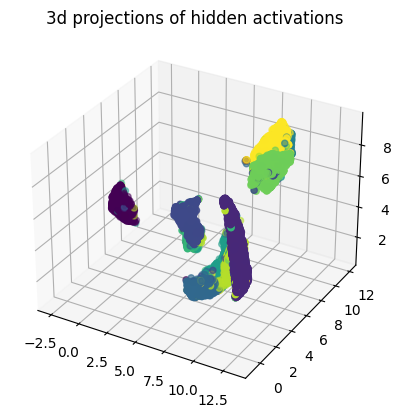

In [9]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=hidden_activations,
    n_components=3,
    predicted=predicted,
    title="3d projections of hidden activations",
)

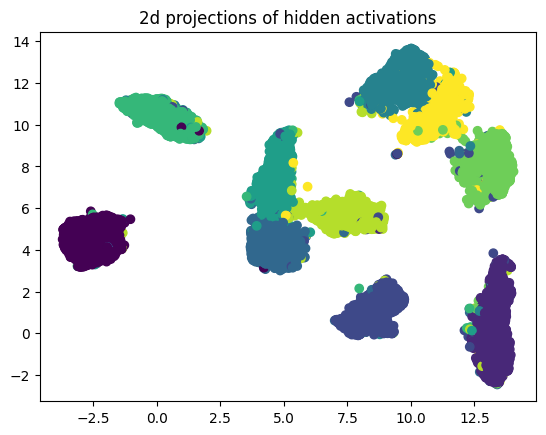

In [10]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=hidden_activations,
    n_components=2,
    predicted=predicted,
    title="2d projections of hidden activations",
)

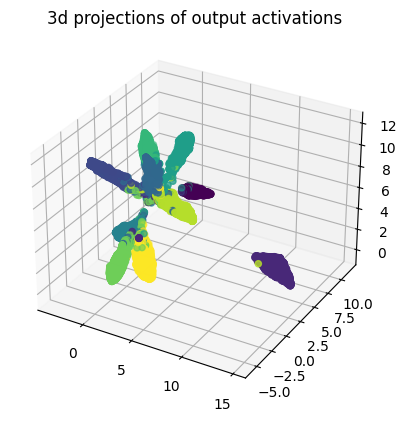

In [11]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=output_activations,
    n_components=3,
    predicted=predicted,
    title="3d projections of output activations",
)

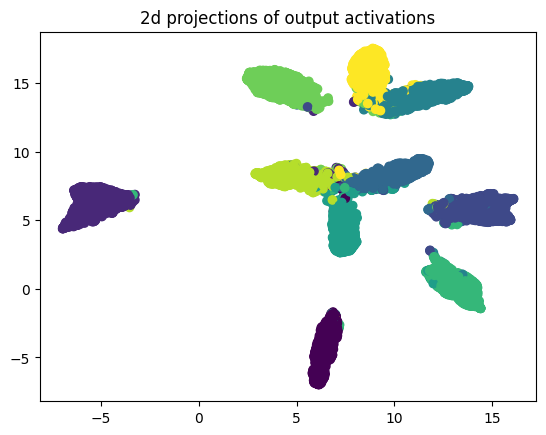

In [12]:
from src.plot_manifold import plot_manifold

plot_manifold(
    data=output_activations,
    n_components=2,
    predicted=predicted,
    title="2d projections of output activations",
)

## Compute perssistence


usetex mode requires TeX.


[1]


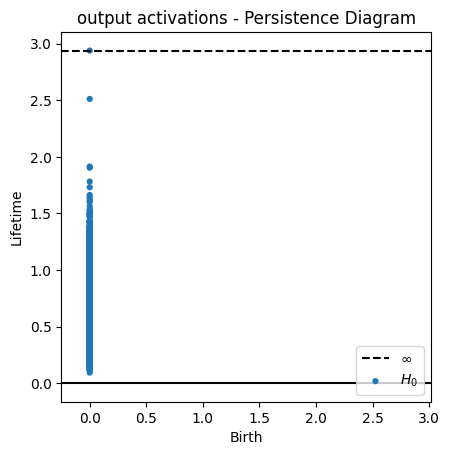

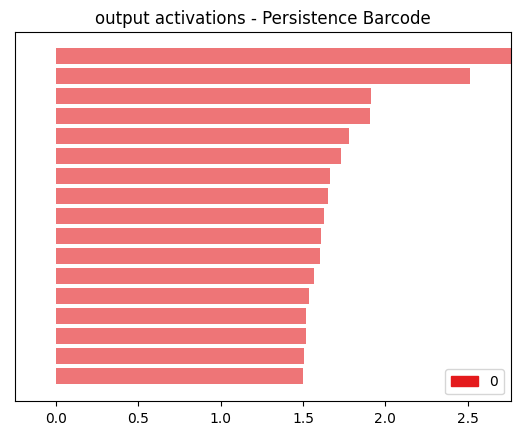

In [13]:
from src.compute_persistent_hom import compute_persistent_hom

compute_persistent_hom(data=output_activations, thresh=40, title="output activations")

[8978]


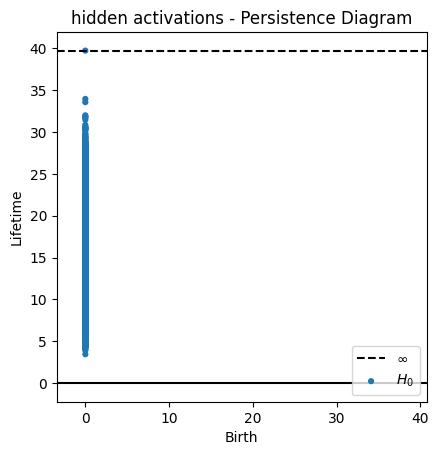

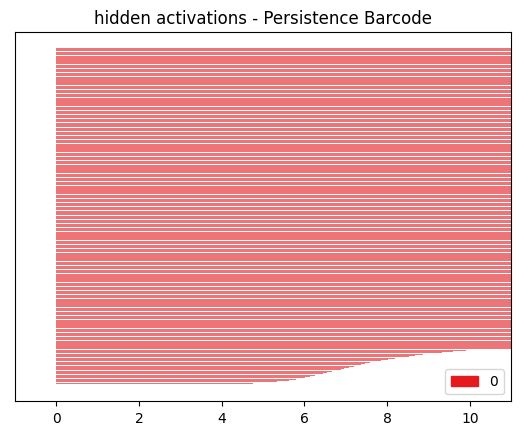

In [14]:
compute_persistent_hom(data=hidden_activations, thresh=40, title="hidden activations")